# Análise dos dados do Orçamento Cidadão de 2022

## Visualização inicial dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ler o arquivo CSV
dataset_url = 'https://raw.githubusercontent.com/iwamotoraphael/participacao-politica/main/arquivos%20de%20dados/projeto-de-lei-orcamentaria-anual-2022.csv'
data = pd.read_csv(dataset_url, sep=',', on_bad_lines='skip')

In [3]:
# Visualizar as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(data.head())

Primeiras linhas do DataFrame:
   Código Data de criação                  Autor              Subprefeitura  \
0    3151      10/05/2021  Fernanda Imperio Lima           Pirituba/Jaraguá   
1     398      18/04/2021        Sandra Carvalho                Campo Limpo   
2    2587      02/05/2021    Vânia Luzia Cabrera  Vila Maria/Vila Guilherme   
3     324      17/04/2021               Pedro H.                Santo Amaro   
4    2081      02/05/2021         Simone Boacnin               Vila Mariana   

                                              Título  \
0                                               3151   
1  Implementação dos parques Horto do Ipê, Capadó...   
2                                               2587   
3  Criar um grande corredor verde em todo trecho ...   
4                                               2081   

                                           Descrição      Categoria  \
0  Viabilização do Parque Brasilandia Projeto de ...  Meio Ambiente   
1  Conforme o D

In [4]:
# Verificar as colunas do DataFrame
print("\nColunas do DataFrame:")
print(data.columns)


Colunas do DataFrame:
Index(['Código', 'Data de criação', 'Autor', 'Subprefeitura', 'Título',
       'Descrição', 'Categoria', 'Link da imagem', 'Documento 1',
       'Documento 2', 'Documento 3', 'Quantidade de apoios',
       'Resultado da priorização', 'Votos', 'Resultado da votação',
       'Viabilidade', 'Compromisso', 'Justificativa',
       'Órgão público responsável (1)', 'Ações orçamentárias (1)',
       'Número do processo SEI (1)', 'Viabilidade técnica (1)',
       'Parecer técnico (1)', 'Viabilidade jurídica (1)',
       'Parecer jurídico (1)', 'Viabilidade orçamentária (1)',
       'Parecer orçamentário (1)'],
      dtype='object')


In [5]:
# Informações gerais sobre o DataFrame
print("\nInformações gerais do DataFrame:")
print(data.info())


Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Código                         3129 non-null   int64 
 1   Data de criação                3129 non-null   object
 2   Autor                          3084 non-null   object
 3   Subprefeitura                  3129 non-null   object
 4   Título                         3129 non-null   object
 5   Descrição                      3129 non-null   object
 6   Categoria                      3129 non-null   object
 7   Link da imagem                 590 non-null    object
 8   Documento 1                    249 non-null    object
 9   Documento 2                    11 non-null     object
 10  Documento 3                    2 non-null      object
 11  Quantidade de apoios           3129 non-null   int64 
 12  Resultado da priorização    

In [6]:
# Estatísticas descritivas das colunas numéricas
print("\nEstatísticas descritivas:")
print(data.describe())


Estatísticas descritivas:
            Código  Quantidade de apoios        Votos
count  3129.000000                3129.0  3129.000000
mean   1588.904762                   0.0     7.842442
std     910.166104                   0.0    38.173966
min       1.000000                   0.0     0.000000
25%     803.000000                   0.0     0.000000
50%    1594.000000                   0.0     0.000000
75%    2377.000000                   0.0     0.000000
max    3160.000000                   0.0  1072.000000


In [7]:
# Colunas a serem removidas
colunas_remover = ['Data de criação', 'Autor', 'Link da imagem', 'Documento 1',
                   'Documento 2', 'Documento 3', 'Ações orçamentárias (1)',
                   'Número do processo SEI (1)', 'Viabilidade técnica (1)',
                   'Parecer técnico (1)', 'Viabilidade jurídica (1)',
                   'Parecer jurídico (1)', 'Viabilidade orçamentária (1)',
                   'Parecer orçamentário (1)']

# Remover as colunas
data = data.drop(columns=colunas_remover)

# Visualizar as primeiras linhas do DataFrame após a remoção
print("Primeiras linhas do DataFrame após a remoção:")
print(data.head())

Primeiras linhas do DataFrame após a remoção:
   Código              Subprefeitura  \
0    3151           Pirituba/Jaraguá   
1     398                Campo Limpo   
2    2587  Vila Maria/Vila Guilherme   
3     324                Santo Amaro   
4    2081               Vila Mariana   

                                              Título  \
0                                               3151   
1  Implementação dos parques Horto do Ipê, Capadó...   
2                                               2587   
3  Criar um grande corredor verde em todo trecho ...   
4                                               2081   

                                           Descrição      Categoria  \
0  Viabilização do Parque Brasilandia Projeto de ...  Meio Ambiente   
1  Conforme o Decreto 53.965/2013 que declara a á...  Meio Ambiente   
2  Monitorar o estado nutricional da população at...          Saúde   
3  Criar um grande corredor verde em todo trecho ...  Meio Ambiente   
4  A Associação Viva 

In [8]:
# Contar o número total de propostas e propostas eleitas
total_propostas = len(data)
eleitas = sum(data['Resultado da votação'] == 'Eleita')

# Calcular a proporção de propostas eleitas em relação ao total
proporcao_eleitas = eleitas / total_propostas

print("Número total de propostas:", total_propostas)
print("Número de propostas eleitas:", eleitas)
print("Proporção de propostas eleitas:", proporcao_eleitas)

Número total de propostas: 3129
Número de propostas eleitas: 161
Proporção de propostas eleitas: 0.05145413870246085


In [9]:
# Calcular o número de propostas consideradas viáveis após serem eleitas
eleitas_viaveis = sum(data[data['Resultado da votação'] == 'Eleita']['Viabilidade'] == 'Viável')
proporcao_eleitas_viaveis = eleitas_viaveis / eleitas

print("Número de propostas consideradas viáveis após eleitas:", eleitas_viaveis)
print("Proporção de propostas consideradas viáveis após eleitas:", proporcao_eleitas_viaveis)

Número de propostas consideradas viáveis após eleitas: 84
Proporção de propostas consideradas viáveis após eleitas: 0.5217391304347826


## Análise geral por subprefeitura

### Número de propostas

In [10]:
# Contar o número de subprefeituras únicas
num_subprefeituras = data['Subprefeitura'].nunique()

# Exibir o número de subprefeituras
print("Número de subprefeituras:", num_subprefeituras)

Número de subprefeituras: 32


In [11]:
# Contar o número de propostas por Subprefeitura
propostas_por_subprefeitura = data['Subprefeitura'].value_counts().reset_index()
propostas_por_subprefeitura.columns = ['Subprefeitura', 'Total de Propostas']
propostas_por_subprefeitura.sort_values(by='Total de Propostas', ascending=False)

# Exibir a contagem de propostas por Subprefeitura
print("Contagem de propostas por Subprefeitura:")
print(propostas_por_subprefeitura)

Contagem de propostas por Subprefeitura:
                Subprefeitura  Total de Propostas
0                  São Mateus                 206
1                  Casa Verde                 203
2                     Butantã                 183
3   Vila Maria/Vila Guilherme                 165
4   Aricanduva/Formosa/Carrão                 139
5                 Campo Limpo                 133
6              Itaim Paulista                 129
7                       Perus                 114
8                 Santo Amaro                 111
9                 Parelheiros                 108
10               Vila Mariana                 107
11                  Sapopemba                 106
12                   Itaquera                 106
13                  Jabaquara                 103
14                      Penha                  99
15                M'Boi Mirim                  95
16          Capela do Socorro                  94
17                   Ipiranga                  92
18       

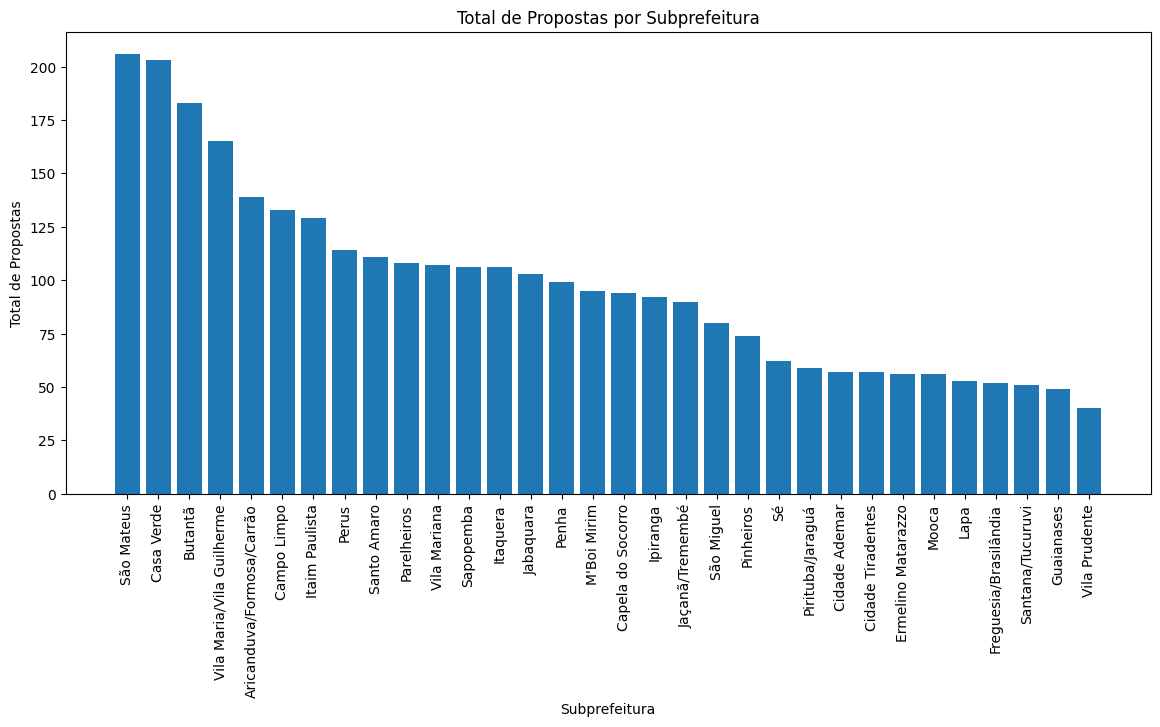

In [12]:
# Plotar o gráfico de barras Subprefeitura x Total de Propostas
plt.figure(figsize=(14, 6))
plt.bar(propostas_por_subprefeitura['Subprefeitura'], propostas_por_subprefeitura['Total de Propostas'])
plt.xlabel('Subprefeitura')
plt.ylabel('Total de Propostas')
plt.title('Total de Propostas por Subprefeitura')
plt.xticks(rotation=90)
plt.show()

### Categoria mais predominante

In [13]:
categorias_por_subprefeitura = data.groupby('Subprefeitura')['Categoria'].agg(lambda x: x.value_counts().index[0])
print(categorias_por_subprefeitura)

Subprefeitura
Aricanduva/Formosa/Carrão                                     Saúde
Butantã                      Zeladoria Urbana e melhorias de bairro
Campo Limpo                  Zeladoria Urbana e melhorias de bairro
Capela do Socorro                      Direitos Humanos e Cidadania
Casa Verde                                                    Saúde
Cidade Ademar                                          Outros temas
Cidade Tiradentes                          Transportes e mobilidade
Ermelino Matarazzo             Desenvolvimento Econômico e Trabalho
Freguesia/Brasilândia                                  Outros temas
Guaianases                                      Segurança Alimentar
Ipiranga                                        Segurança Alimentar
Itaim Paulista                                                Saúde
Itaquera                     Zeladoria Urbana e melhorias de bairro
Jabaquara                                       Segurança Alimentar
Jaçanã/Tremembé              Zelad

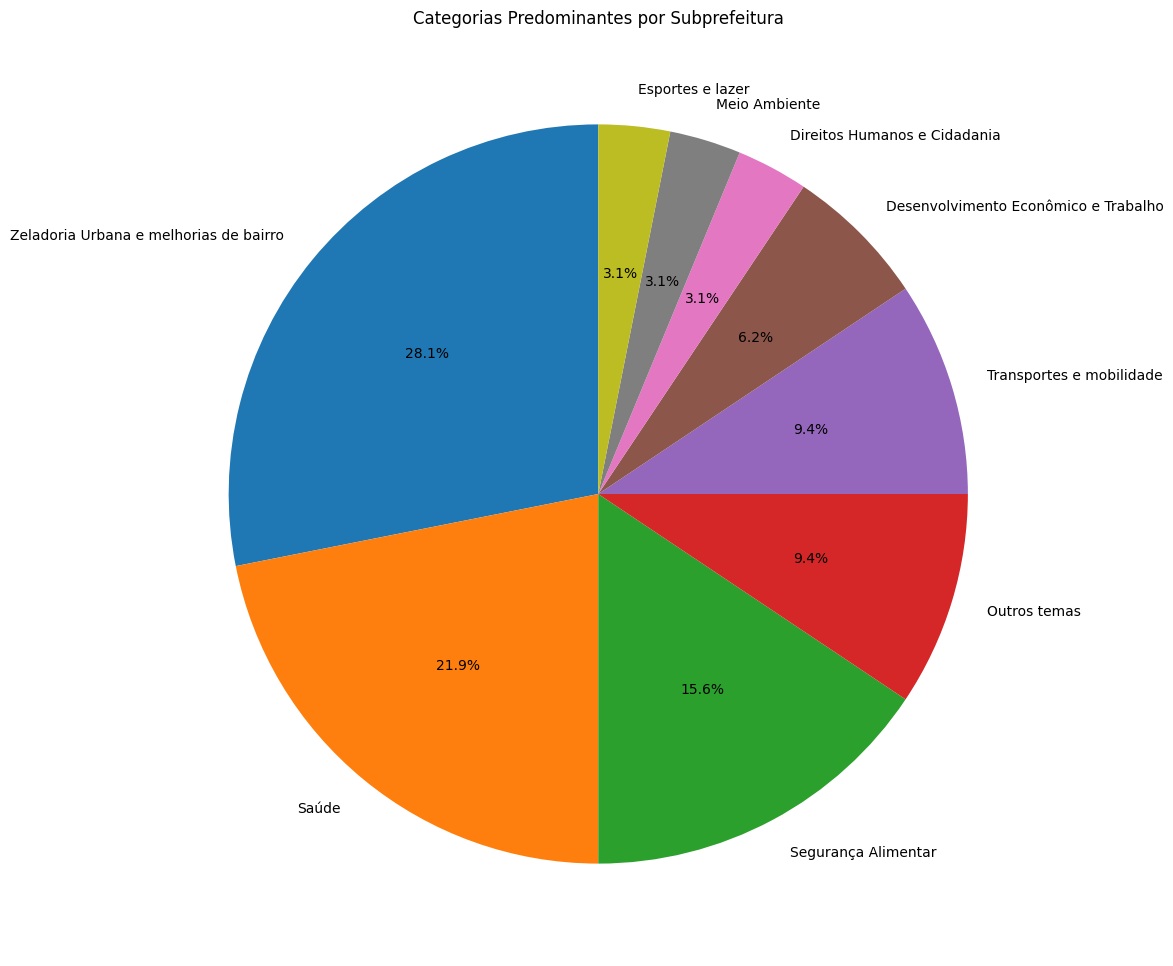

In [14]:
# Categorias por subprefeitura
categorias_por_subprefeitura = data.groupby('Subprefeitura')['Categoria'].agg(lambda x: x.value_counts().index[0])

# Contagem das categorias
contagem_categorias = categorias_por_subprefeitura.value_counts()

# Configurações do gráfico
plt.figure(figsize=(17, 12))
plt.pie(contagem_categorias, labels=contagem_categorias.index, autopct='%1.1f%%', startangle=90)
plt.title('Categorias Predominantes por Subprefeitura')

# Exibição do gráfico
plt.show()

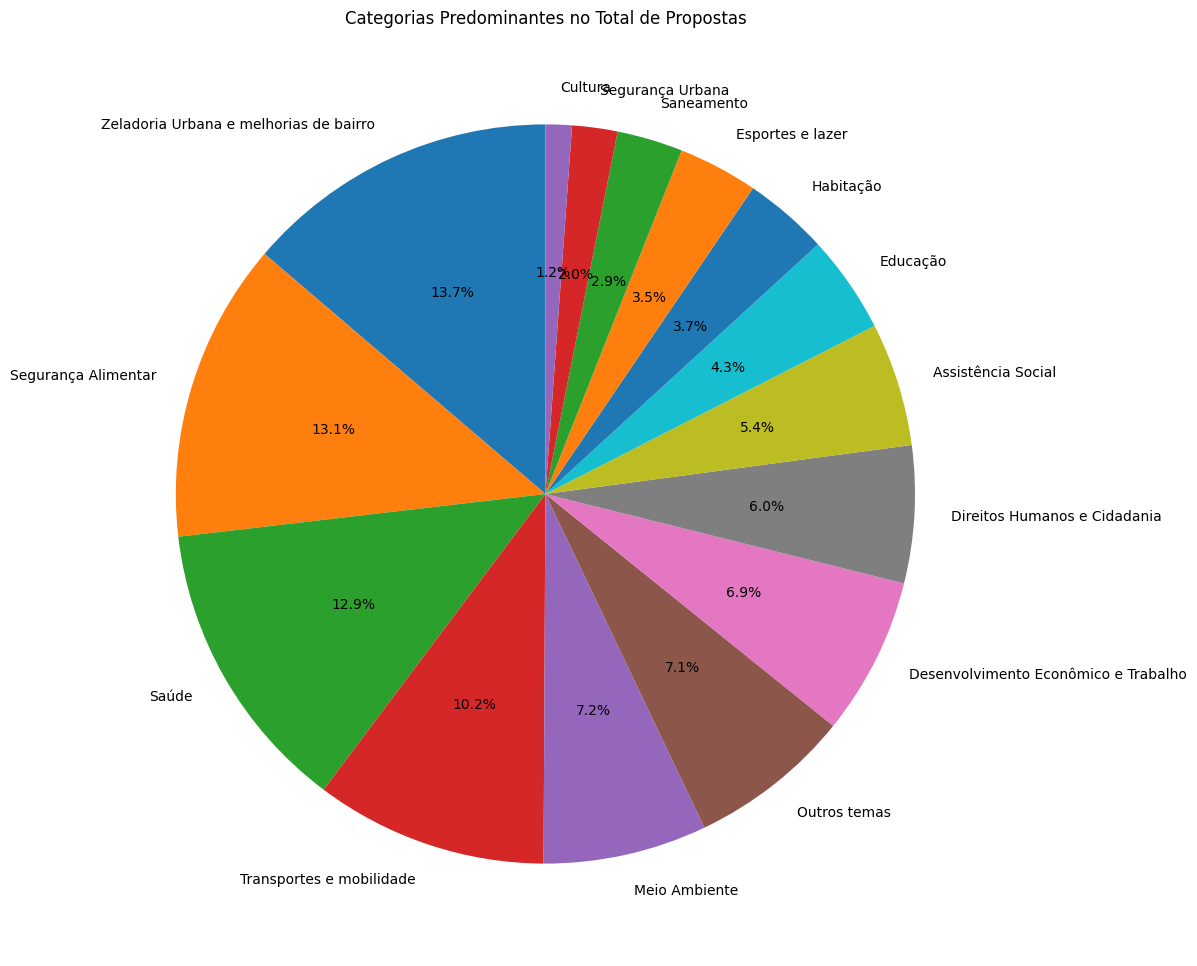

In [15]:
# Contagem das categorias no conjunto de dados completo
contagem_categorias = data['Categoria'].value_counts()

# Configurações do gráfico
plt.figure(figsize=(17, 12))
plt.pie(contagem_categorias, labels=contagem_categorias.index, autopct='%1.1f%%', startangle=90)
plt.title('Categorias Predominantes no Total de Propostas')

# Exibição do gráfico
plt.show()

### Densidade demográfica e número de propostas

In [16]:
# Incluir os dados de população e densidade demográfica das subprefeituras (https://www.prefeitura.sp.gov.br/cidade/secretarias/subprefeituras/subprefeituras/dados_demograficos/index.php?p=12758)
dados = {
    'Subprefeitura': ['Aricanduva', 'Butantã', 'Campo Limpo', 'Capela do Socorro', 'Casa Verde', 'Cidade Ademar', 'Cidade Tiradentes', 'Ermelino Matarazzo', 'Freguesia do Ó', 'Guaianases', 'Ipiranga', 'Itaim Paulista', 'Itaquera', 'Jabaquara', 'Jaçanã', 'Lapa', 'M’Boi Mirim', 'Mooca', 'Parelheiros', 'Penha', 'Perus', 'Pinheiros', 'Pirituba', 'Santana', 'Santo Amaro', 'São Mateus', 'São Miguel', 'Sapopemba', 'Sé', 'Vila Maria/Vila Guilherme', 'Vila Mariana', 'Vila Prudente'],
    'População Total': [267702, 428217, 607105, 594930, 309376, 410998, 211501, 207509, 407245, 268508, 463804, 373127, 523848, 223780, 291867, 305526, 563305, 343980, 139441, 474659, 146046, 289743, 437592, 324815, 238025, 426794, 369496, 284524, 431106, 297713, 244632, 246589],
    'Densidade Demográfica': [12451, 7633, 16542, 4433, 11587, 13388, 14100, 13742, 12928, 15085, 12368, 17195, 9647, 15871, 4553, 7619, 9071, 9772, 394, 11090, 2553, 9140, 8000, 9361, 6347, 9319, 15206, 21076, 16454, 11277, 13005, 12454]
}

df_subprefeituras = pd.DataFrame(dados)

print(df_subprefeituras)

                Subprefeitura  População Total  Densidade Demográfica
0                  Aricanduva           267702                  12451
1                     Butantã           428217                   7633
2                 Campo Limpo           607105                  16542
3           Capela do Socorro           594930                   4433
4                  Casa Verde           309376                  11587
5               Cidade Ademar           410998                  13388
6           Cidade Tiradentes           211501                  14100
7          Ermelino Matarazzo           207509                  13742
8              Freguesia do Ó           407245                  12928
9                  Guaianases           268508                  15085
10                   Ipiranga           463804                  12368
11             Itaim Paulista           373127                  17195
12                   Itaquera           523848                   9647
13                  

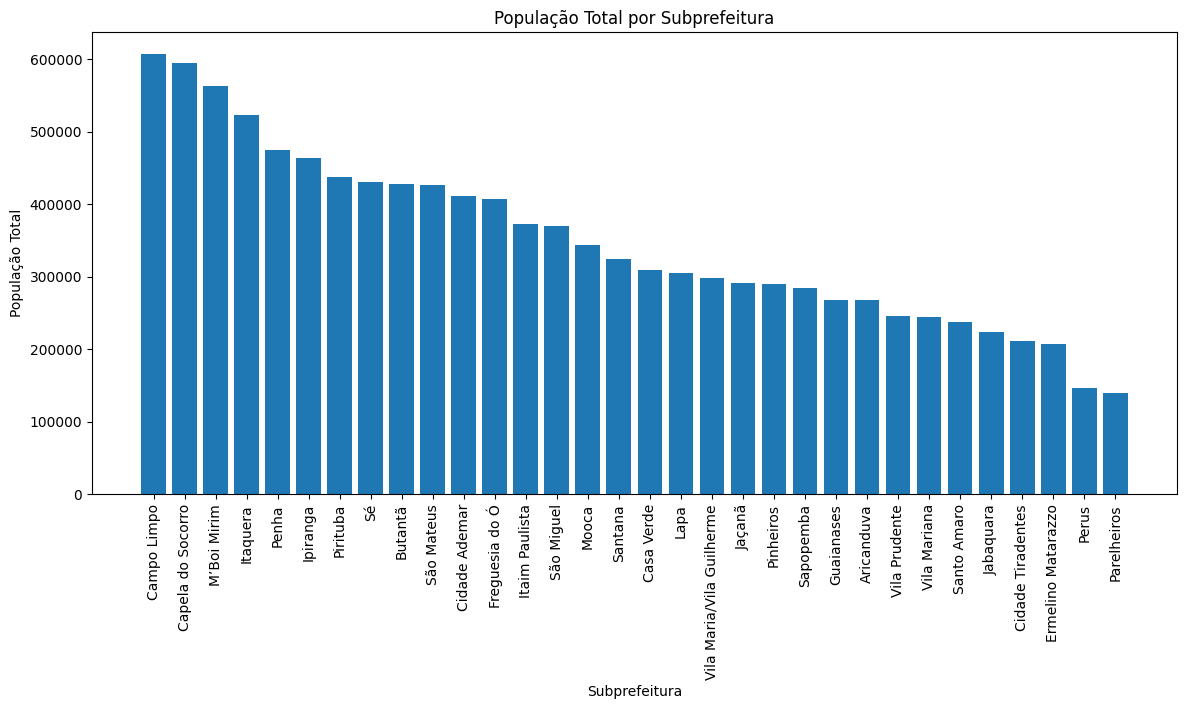

In [17]:
# Plotar o gráfico de barras Subprefeitura x População Total
df_subprefeituras_ordenado = df_subprefeituras.sort_values(by='População Total', ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(df_subprefeituras_ordenado['Subprefeitura'], df_subprefeituras_ordenado['População Total'])
plt.xlabel('Subprefeitura')
plt.ylabel('População Total')
plt.title('População Total por Subprefeitura')
plt.xticks(rotation=90)
plt.show()

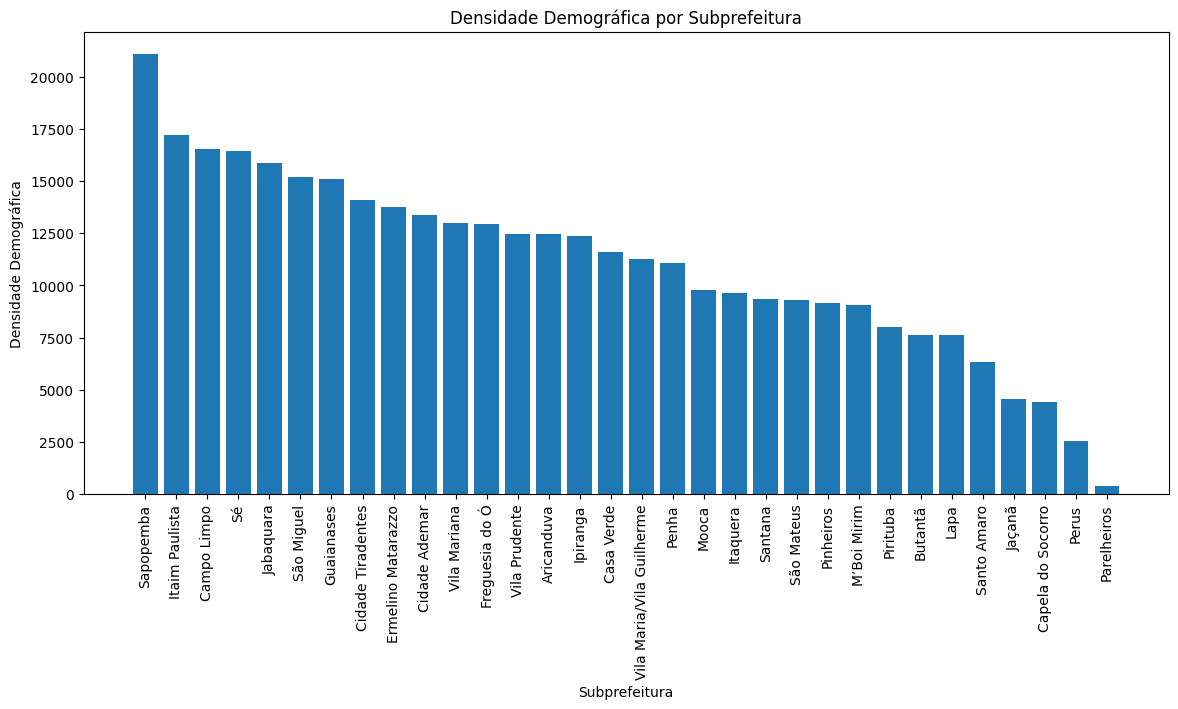

In [18]:
# Plotar o gráfico de barras Subprefeitura x Densidade Demográfica
df_subprefeituras_ordenado = df_subprefeituras.sort_values(by='Densidade Demográfica', ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(df_subprefeituras_ordenado['Subprefeitura'], df_subprefeituras_ordenado['Densidade Demográfica'])
plt.xlabel('Subprefeitura')
plt.ylabel('Densidade Demográfica')
plt.title('Densidade Demográfica por Subprefeitura')
plt.xticks(rotation=90)
plt.show()

In [19]:
df_subprefeituras_propostas = pd.merge(df_subprefeituras, propostas_por_subprefeitura, on='Subprefeitura', how='inner')
print(df_subprefeituras_propostas.head())

       Subprefeitura  População Total  Densidade Demográfica  \
0            Butantã           428217                   7633   
1        Campo Limpo           607105                  16542   
2  Capela do Socorro           594930                   4433   
3         Casa Verde           309376                  11587   
4      Cidade Ademar           410998                  13388   

   Total de Propostas  
0                 183  
1                 133  
2                  94  
3                 203  
4                  57  


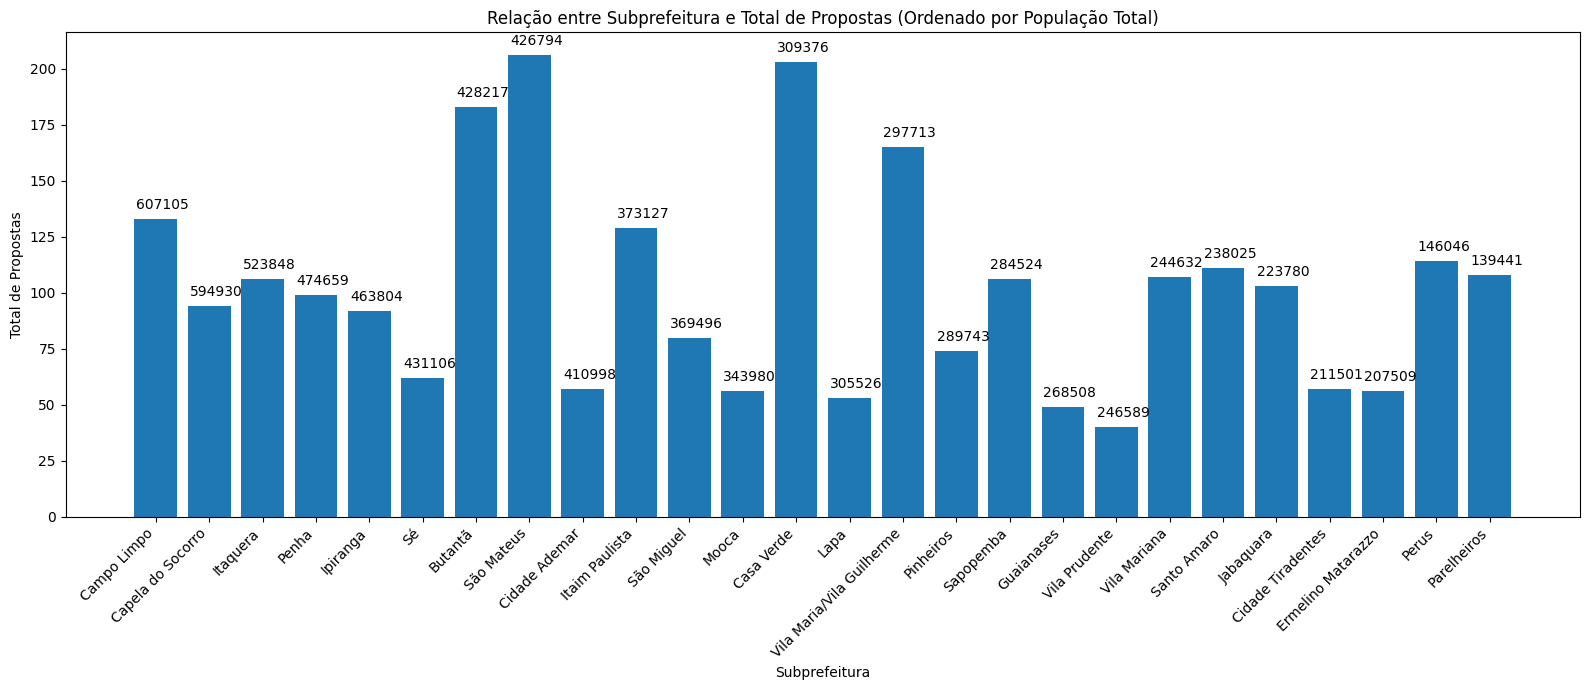

In [20]:
# Ordenar o dataframe por "População Total"
df_subprefeituras_propostas_ordenado = df_subprefeituras_propostas.sort_values(by='População Total', ascending=False)

plt.figure(figsize=(16, 7))
plt.bar(df_subprefeituras_propostas_ordenado['Subprefeitura'], df_subprefeituras_propostas_ordenado['Total de Propostas'])
plt.xlabel('Subprefeitura')
plt.ylabel('Total de Propostas')
plt.title('Relação entre Subprefeitura e Total de Propostas (Ordenado por População Total)')

# Adicionando o valor de "População Total" nas barras
for i, row in df_subprefeituras_propostas_ordenado.iterrows():
    plt.annotate(str(row['População Total']), (row['Subprefeitura'], row['Total de Propostas']), xytext=(5, 5),
                 textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

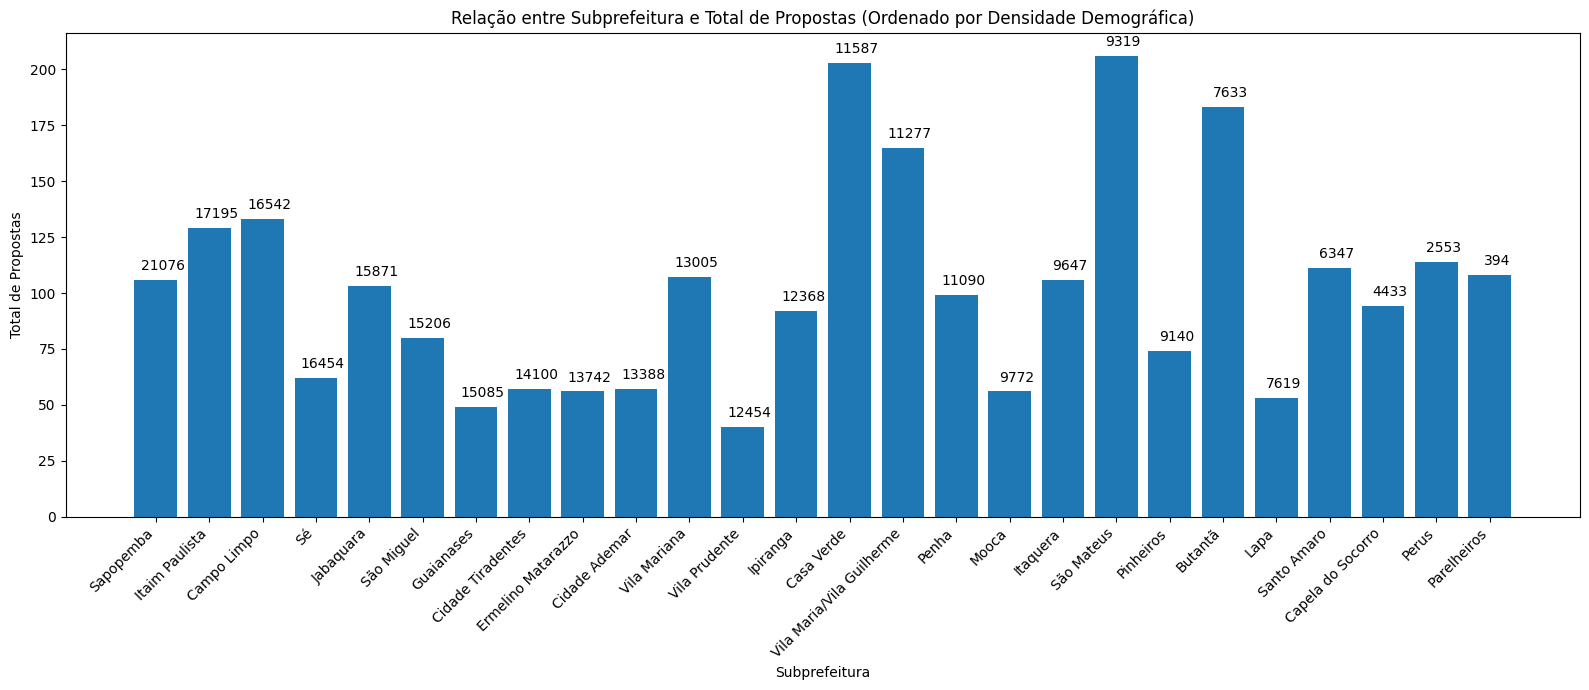

In [21]:
# Ordenar o dataframe por "Densidade Demográfica"
df_subprefeituras_propostas_ordenado = df_subprefeituras_propostas.sort_values(by='Densidade Demográfica', ascending=False)

plt.figure(figsize=(16, 7))
plt.bar(df_subprefeituras_propostas_ordenado['Subprefeitura'], df_subprefeituras_propostas_ordenado['Total de Propostas'])
plt.xlabel('Subprefeitura')
plt.ylabel('Total de Propostas')
plt.title('Relação entre Subprefeitura e Total de Propostas (Ordenado por Densidade Demográfica)')

# Adicionando o valor de "Densidade Demográfica" nas barras
for i, row in df_subprefeituras_propostas_ordenado.iterrows():
    plt.annotate(str(row['Densidade Demográfica']), (row['Subprefeitura'], row['Total de Propostas']), xytext=(5, 5),
                 textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# Proporção de propostas por habitante da Subprefeitura
df_subprefeituras_propostas['Proporção de Propostas'] = df_subprefeituras_propostas['Total de Propostas'] / df_subprefeituras_propostas['População Total']
df_subprefeituras_propostas.sort_values(by='Proporção de Propostas', ascending=False)
print("Proporção de propostas em relação à população:\n", df_subprefeituras_propostas[['Subprefeitura', 'Proporção de Propostas']])

Proporção de propostas em relação à população:
                 Subprefeitura  Proporção de Propostas
0                     Butantã                0.000427
1                 Campo Limpo                0.000219
2           Capela do Socorro                0.000158
3                  Casa Verde                0.000656
4               Cidade Ademar                0.000139
5           Cidade Tiradentes                0.000270
6          Ermelino Matarazzo                0.000270
7                  Guaianases                0.000182
8                    Ipiranga                0.000198
9              Itaim Paulista                0.000346
10                   Itaquera                0.000202
11                  Jabaquara                0.000460
12                       Lapa                0.000173
13                      Mooca                0.000163
14                Parelheiros                0.000775
15                      Penha                0.000209
16                      Perus     

In [23]:
# Cálculo da correlação entre População Total e Total de Propostas (valor entre -1 e 1)
correlacao = df_subprefeituras_propostas['População Total'].corr(df_subprefeituras_propostas['Total de Propostas'])
print("Correlação entre população total e total de propostas:", correlacao)

Correlação entre população total e total de propostas: 0.19188557366161152


In [24]:
# Cálculo da correlação entre Densidade Demográfica e Total de Propostas (valor entre -1 e 1)
correlacao = df_subprefeituras_propostas['Densidade Demográfica'].corr(df_subprefeituras_propostas['Total de Propostas'])
print("Correlação entre densidade demográfica e total de propostas:", correlacao)

Correlação entre densidade demográfica e total de propostas: -0.1561420559730856


## Análise das subprefeituras escolhidas

### Funções base

In [25]:
def total_de_apoios(nome_da_subprefeitura: str) -> int:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  return subprefeitura_data['Quantidade de apoios'].sum()

In [26]:
def dados_gerais_da_subprefeitura(nome_da_subprefeitura: str) -> None:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  # Filtrar as propostas que têm viabilidade igual a "Viável"
  propostas_viaveis = subprefeitura_data[subprefeitura_data['Viabilidade'] == 'Viável']

  # Calcular o número de propostas viáveis
  num_propostas_viaveis = len(propostas_viaveis)

  total_apoios = total_de_apoios(nome_da_subprefeitura)

  # Calcular o número total de votos deixados
  total_votos = subprefeitura_data['Votos'].sum()

  # Obter população total e densidade demográfica
  subprefeitura_data = df_subprefeituras[df_subprefeituras['Subprefeitura'] == nome_da_subprefeitura]
  populacao_total = subprefeitura_data['População Total'].values[0]
  densidade_demografica = subprefeitura_data['Densidade Demográfica'].values[0]

  print("Número de propostas viáveis:", num_propostas_viaveis)
  print("Número total de apoios deixados:", total_apoios)
  print("Número total de votos deixados:", total_votos)
  print("População total:", populacao_total)
  print("Densidade demográfica:", densidade_demografica)

In [27]:
def grafico_propostas_por_categoria(nome_da_subprefeitura: str) -> None:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  # Contar o número de propostas em cada categoria
  categorias_count = subprefeitura_data['Categoria'].value_counts()

  # Criar o gráfico de setores
  plt.figure(figsize=(8, 6))
  plt.pie(categorias_count, labels=categorias_count.index, autopct='%1.1f%%')
  plt.title(f"Distribuição das Propostas por Categoria - {nome_da_subprefeitura}")
  plt.axis('equal')
  plt.show()

In [28]:
def propostas_mais_apoios(nome_da_subprefeitura: str) -> None:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  # Propostas com maior quantidade de apoios
  propostas_maior_apoio = subprefeitura_data.nlargest(10, 'Quantidade de apoios')

  print("Propostas com maior quantidade de apoios:")
  for i, proposta in propostas_maior_apoio.iterrows():
    print("Proposta:")
    print("- Título:", proposta['Título'])
    print("- Descrição:", proposta['Descrição'])
    print("- Quantidade de apoios:", proposta['Quantidade de apoios'])
    print()

In [29]:
def propostas_mais_votos(nome_da_subprefeitura: str) -> None:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  # Propostas com maior quantidade de votos
  propostas_maior_votos = subprefeitura_data.nlargest(10, 'Votos')

  print("\nPropostas com maior quantidade de votos:")
  for i, proposta in propostas_maior_votos.iterrows():
    print("Proposta:")
    print("- Título:", proposta['Título'])
    print("- Descrição:", proposta['Descrição'])
    print("- Categoria:", proposta['Categoria'])
    print("- Quantidade de votos:", proposta['Votos'])
    print()

In [30]:
def propostas_eleitas(nome_da_subprefeitura: str) -> None:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  # Propostas com resultado da votação "Eleita" e sua viabilidade
  eleitas = subprefeitura_data[subprefeitura_data['Resultado da votação'] == 'Eleita']

  print("\nPropostas eleitas e sua viabilidade:")
  for i, proposta in eleitas.iterrows():
    print("Proposta:")
    print("- Título:", proposta['Título'])
    print("- Descrição:", proposta['Descrição'])
    print("- Categoria:", proposta['Categoria'])
    print("- Quantidade de votos:", proposta['Votos'])
    print("- Viabilidade:", proposta['Viabilidade'])
    print()

In [31]:
def grafico_propostas_eleitas_viaveis(nome_da_subprefeitura: str) -> None:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  total_propostas = len(subprefeitura_data)
  eleitas = sum(subprefeitura_data['Resultado da votação'] == 'Eleita')

  # Calcular o número de propostas consideradas viáveis após serem eleitas
  eleitas_viaveis = sum((subprefeitura_data['Resultado da votação'] == 'Eleita') & (subprefeitura_data['Viabilidade'] == 'Viável'))

  # Criar o gráfico de barras
  plt.figure(figsize=(10, 6))
  plt.bar(['Total', 'Eleitas', 'Viáveis'], [total_propostas, eleitas, eleitas_viaveis])
  plt.xlabel('Propostas')
  plt.ylabel('Total')
  plt.title(f"Propostas totais, eleitas e viáveis - {nome_da_subprefeitura}")

  # Exibir o número correspondente de propostas acima de cada barra
  for i, v in enumerate([total_propostas, eleitas, eleitas_viaveis]):
      plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

  # Exibir o gráfico
  plt.show()


### Subprefeitura: Pinheiros

In [32]:
subprefeitura = 'Pinheiros'

In [33]:
dados_gerais_da_subprefeitura(subprefeitura)

Número de propostas viáveis: 2
Número total de apoios deixados: 0
Número total de votos deixados: 584
População total: 289743
Densidade demográfica: 9140


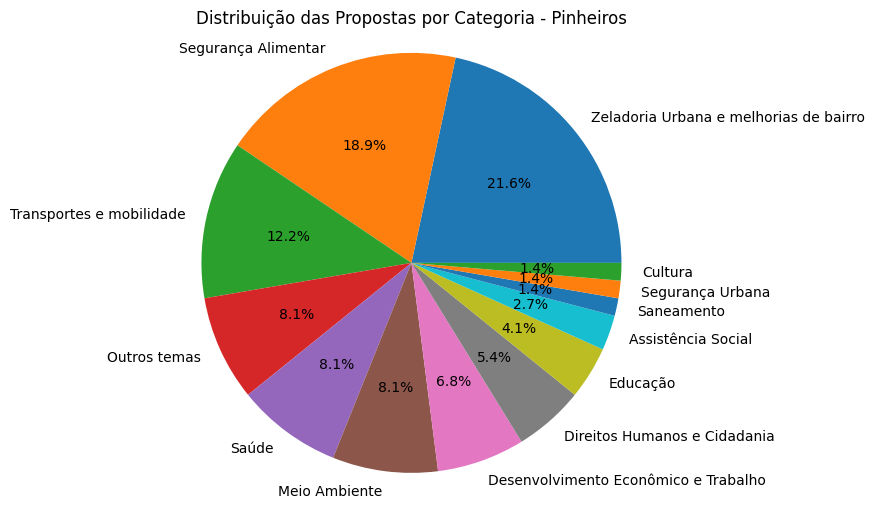

In [34]:
grafico_propostas_por_categoria(subprefeitura)

In [35]:
apoios = total_de_apoios(subprefeitura)
if (apoios != 0):
  propostas_mais_apoios(subprefeitura)
else:
  print("Total de apoios para a subprefeitura é 0.")

Total de apoios para a subprefeitura é 0.


In [36]:
propostas_mais_votos(subprefeitura)


Propostas com maior quantidade de votos:
Proposta:
- Título: Não permitir a instalação de grades/cercas ao redor das praças da região.
- Descrição: Em busca de incentivar as praças como espaços educativos, culturais e agregadores, a proposta visa não permitir a instalação de grades/cercas ao redor das praças.
- Categoria: Meio Ambiente
- Quantidade de votos: 127

Proposta:
- Título: Implantação de Unidade Básica de Saúde na região do Largo da Batata
- Descrição: Implantar UBS (Unidade Básica de Saúde) na região do Lgo. da Batata. A Subprefeitura de Pinheiros é uma das que tem o menor número de serviços públicos de saúde da Atenção Primária, proporcional à sua população. Na região do Lgo. da Batata encontram-se bolsões de vulnerabilidade socio-econômica que precisam de maior atenção à promoção, prevenção, assistência e reabilitação em saúde. É fundamental a implantação de uma UBS com Equipe de Atenção Básica (EAB) e cuidados na Saúde da Criança, do Adulto, do Idoso, Saúde Mental, vacin

In [37]:
propostas_eleitas(subprefeitura)


Propostas eleitas e sua viabilidade:
Proposta:
- Título: Não permitir a instalação de grades/cercas ao redor das praças da região.
- Descrição: Em busca de incentivar as praças como espaços educativos, culturais e agregadores, a proposta visa não permitir a instalação de grades/cercas ao redor das praças.
- Categoria: Meio Ambiente
- Quantidade de votos: 127
- Viabilidade: Inviável

Proposta:
- Título: Implantar Programa Wi-fi Livre SP em todas as escolas da rede municipal
- Descrição: Implantar pontos do Programa Wi-fi Livre SP em todas as escolas da rede municipal. Como as escolas são os equipamentos mais capilares do município, o Programa já é consolidado e sua expansão está prevista na meta 57 da PMSP; a ação se mostra perene, de baixo custo, rápida implantação, além de basilar para outras políticas.
- Categoria: Direitos Humanos e Cidadania
- Quantidade de votos: 43
- Viabilidade: Viável

Proposta:
- Título: Implantação de Unidade Básica de Saúde na região do Largo da Batata
- De

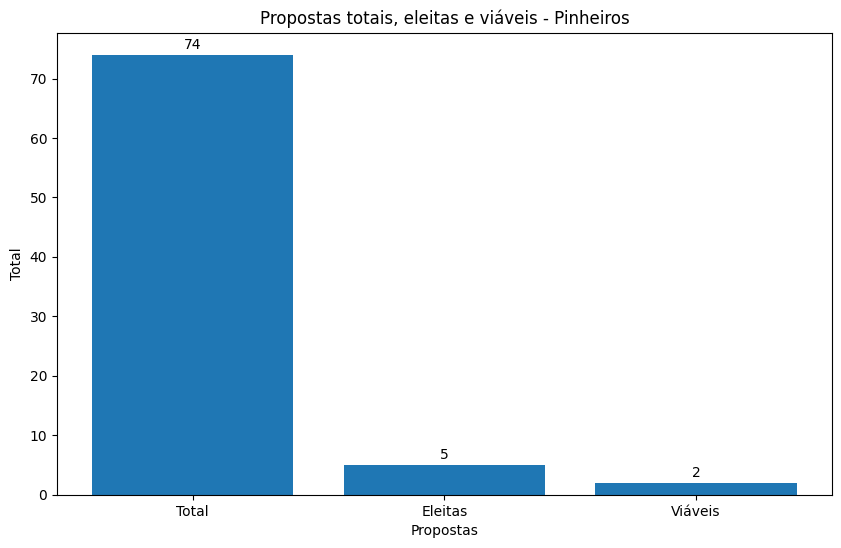

In [38]:
grafico_propostas_eleitas_viaveis(subprefeitura)